In [16]:
!git clone https://github.com/mystery2828/rvimt

fatal: destination path 'rvimt' already exists and is not an empty directory.


In [17]:
import pandas as pd


In [18]:
df=pd.read_csv("/content/rvimt/winequality-red.csv")


In [19]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

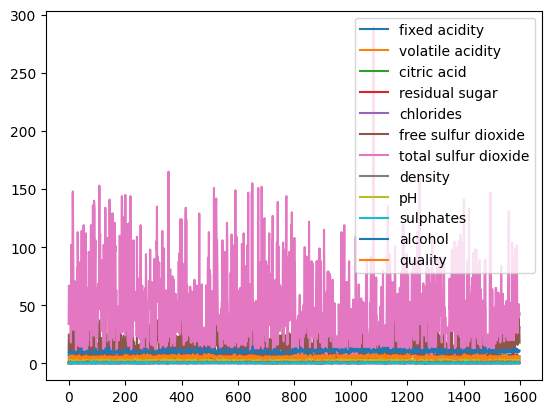

In [23]:
df.plot()

In [35]:
X = df.drop('quality', axis=1)
y = df['quality']

**Preprocessing**

In [36]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Graph Ploting**

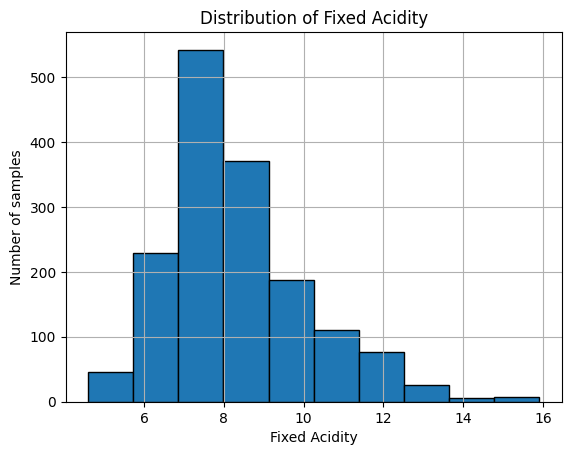

In [41]:
plt.hist(X['fixed acidity'], bins=10, edgecolor='black')
plt.xlabel('Fixed Acidity')
plt.ylabel('Number of samples')
plt.title('Distribution of Fixed Acidity')
plt.grid(True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Function for evaluating the model
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)


    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
    disp.plot()
    plt.plot()
    return accuracy, report, confusion_mat

**Confusion Matrix**

In [48]:
y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


**Accuracy Score**

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.559375


In [54]:
def visualize_tree(classifier, feature_names):
    plt.figure(figsize=(15, 10))
    plot_tree(classifier, feature_names=feature_names, class_names=classifier.classes_, filled=True)
    plt.show()

In [56]:
from sklearn.tree import export_graphviz

In [58]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')

In [59]:
classifier = dt_entropy.fit(df.drop('quality', axis=1), df['quality'])

In [64]:
import numpy as np

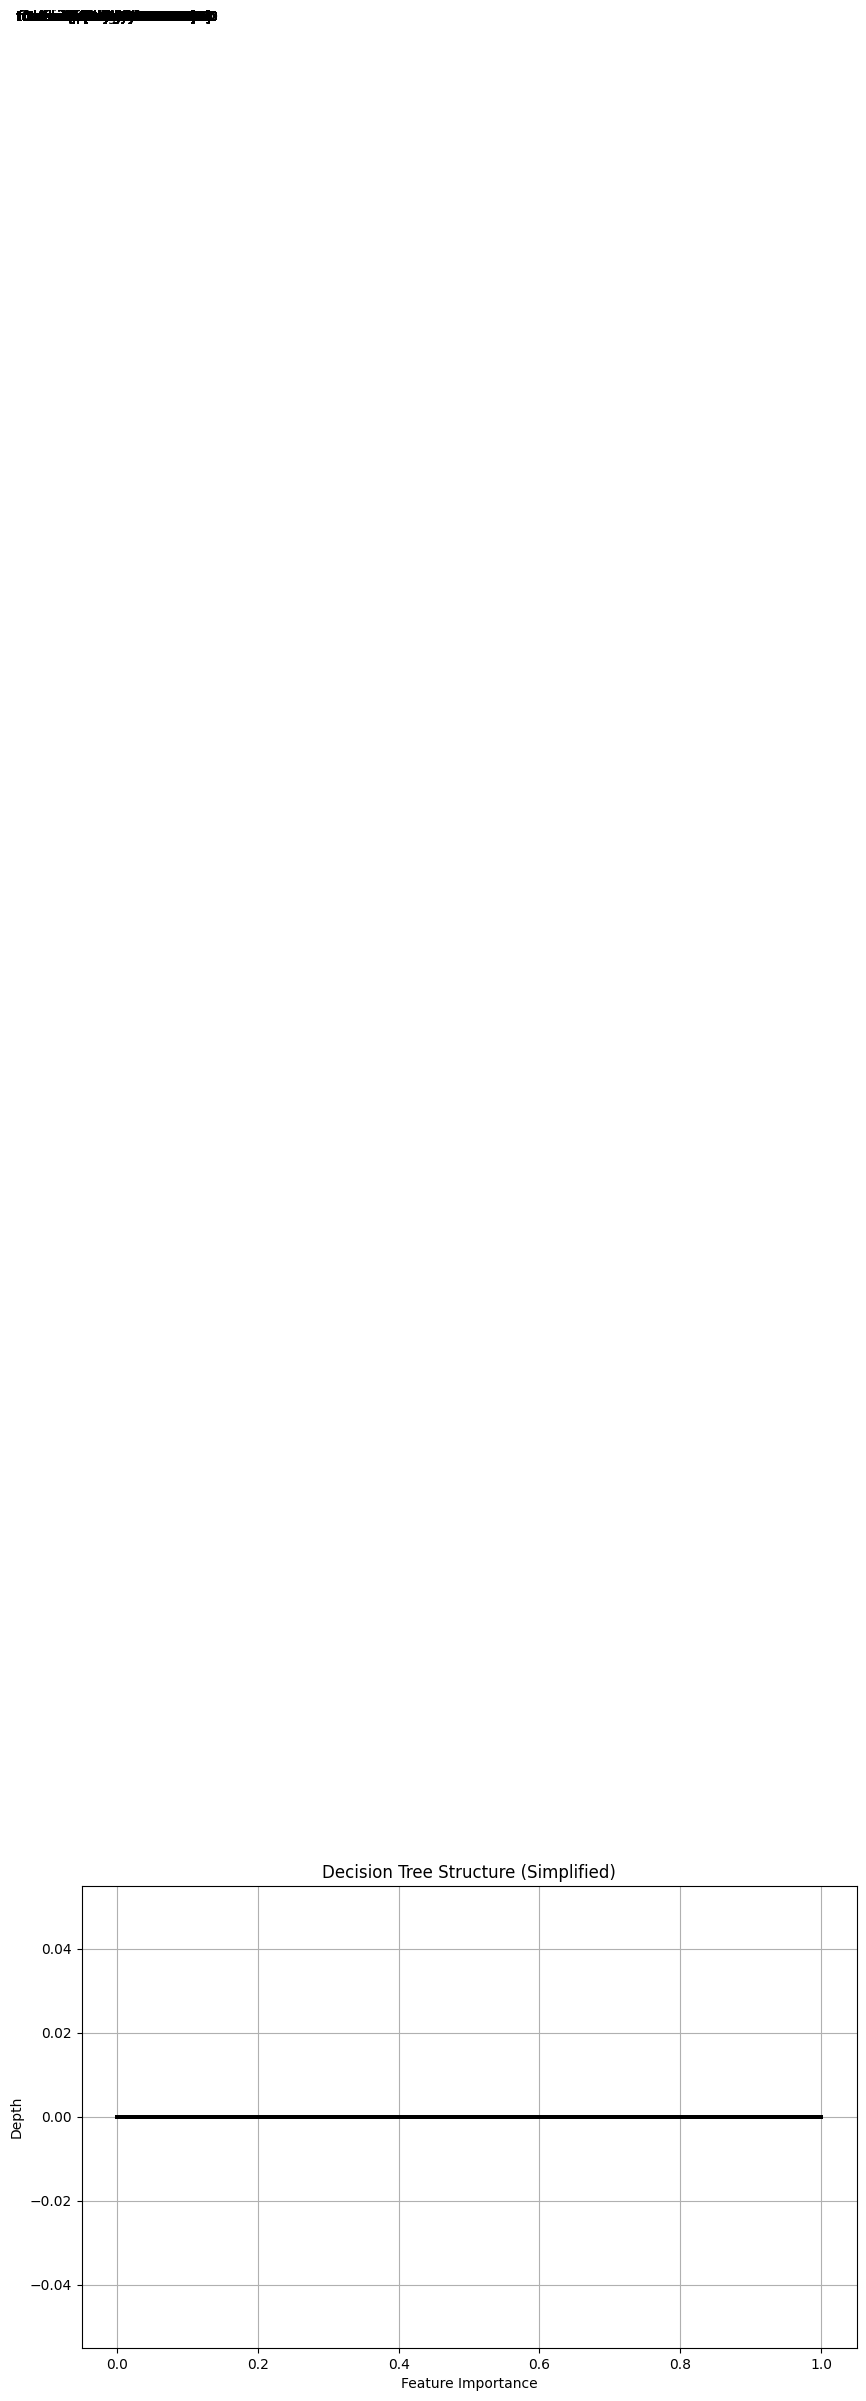

In [65]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Assuming your classifier is named 'dt_model'
def plot_decision_tree(dt_model, feature_names):
    n_nodes = dt_model.tree_.node_count
    children_left = dt_model.tree_.children_left
    children_right = dt_model.tree_.children_right
    feature = dt_model.tree_.feature
    threshold = dt_model.tree_.threshold
    value = dt_model.tree_.value

    parent = np.zeros(shape=n_nodes, dtype=np.int64)
    parent[:] = -1  # Initialize parent pointers

    # Traverse the tree to construct parent pointers
    for i in range(1, n_nodes):
        parent[i] = children_left[parent[i]] if children_left[i] != -2 else children_right[i]

    # Create node positions based on depth
    def recursive_node_pos(node, depth, x_left, x_right):
        if (children_left[node] == -1) & (children_right[node] == -1):  # Leaf node
            return x_left, x_right
        mid = 0.5 * (x_left + x_right)
        x_left, left_pos = recursive_node_pos(children_left[node], depth + 1, x_left, mid)
        x_right, right_pos = recursive_node_pos(children_right[node], depth + 1, mid, x_right)
        return x_left, right_pos

    node_x_pos = np.zeros(shape=n_nodes)
    for i in range(n_nodes):
        node_x_pos[i], _ = recursive_node_pos(i, 0, 0, 1)

    # Create plot
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    for i in range(n_nodes):
        if children_left[i] != -1:  # Non-leaf node
            plt.plot([node_x_pos[parent[i]], node_x_pos[i]], color='black', linewidth=1.5)
            if feature[i] != -2:  # Split based on a feature
                plt.text(node_x_pos[i], 0.5, f"{feature_names[feature[i]]} <= {threshold[i]:.2f}",
                         ha='center', va='center', fontsize=10)
            else:  # Split based on class
                plt.text(node_x_pos[i], 0.5, f"Class: {value[i][0]}", ha='center', va='center', fontsize=10)
        else:  # Leaf node
            plt.text(node_x_pos[i], 0.5, f"Class: {value[i][0]}", ha='center', va='center', fontsize=10)

    plt.xlabel("Feature Importance")
    plt.ylabel("Depth")
    plt.title("Decision Tree Structure (Simplified)")
    plt.grid(True)
    plt.show()

# Call the function to visualize the tree
plot_decision_tree(dt_model, X.columns)
